In [1]:
# pip install tensorflow==2.0.0-beta1
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [4]:
dataset = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [54]:
type(dataset)

tuple

In [55]:
(X_train, y_train), (X_test , y_test) = dataset

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [56]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [57]:
# (X, y), (_ , _) = dataset
# print(X.shape, y.shape)
# (60000, 28, 28) (60000,)

# N = len(X)
# print(N)
# 60000

# X_train, y_train = X[:-N//2], y[:-N//2]
# print(X_train.shape, y_train.shape)
# (30000, 28, 28) (30000,)

# X_test, y_test = X[-N//2:], y[-N//2:]
# print(X_test.shape, y_test.shape)
# (30000, 28, 28) (30000,)

In [58]:
M = 128  # Hyperparameter. Hidden state of size M
K = 10  # Fashion mnist has 10 output classes

In [59]:
visible = Input(shape=(28, 28))
hidden = LSTM(M)(visible)
output = Dense(K, activation='softmax')(hidden)

model = Model(inputs=visible, outputs=output)

In [60]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


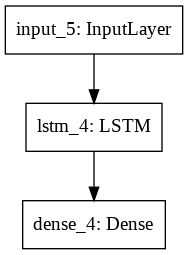

In [61]:
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')

In [62]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [63]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)      # default batch size = 32. 
                                                                                    # 60000/32 = 1875

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.5750 - accuracy: 0.7875 - val_loss: 0.4547 - val_accuracy: 0.8340
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4007 - accuracy: 0.8530 - val_loss: 0.3944 - val_accuracy: 0.8529
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3555 - accuracy: 0.8691 - val_loss: 0.3555 - val_accuracy: 0.8690
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3267 - accuracy: 0.8795 - val_loss: 0.3464 - val_accuracy: 0.8718
Epoch 5/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3045 - accuracy: 0.8856 - val_loss: 0.3306 - val_accuracy: 0.8789
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2872 - accuracy: 0.8921 - val_loss: 0.3374 - val_accuracy: 0.8790
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2711 - accuracy: 0.8998 - val_loss: 0.3132 -

In [64]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

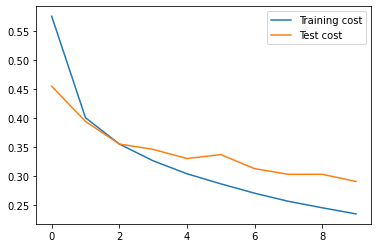

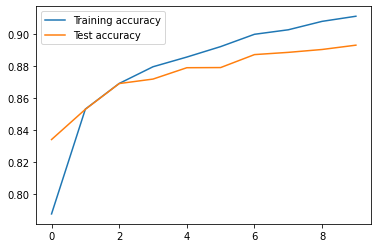

In [65]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.show()

In [66]:
# Evaluation.
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.291218101978302
Test accuracy: 0.8930000066757202
